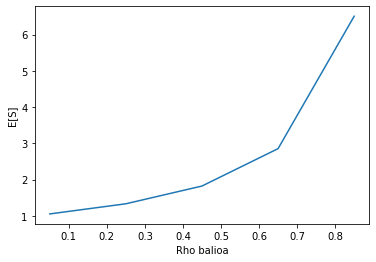

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
        
def MM1_g(bezero_kopurua,lambda_,zer_den):
    #bezeroen iritsiera denborak
    ir_a_den=[]
    for i in range(bezero_kopurua):
        ir_a_den.append(
            np.random.exponential(1/lambda_))

    iritsi_den=[]
    for i in range(bezero_kopurua):
        if i==0:
            iritsi_den.append(ir_a_den[0])
        else:
            iritsi_den.append(iritsi_den[i-1]
                              +ir_a_den[i])
   
    bezero_indizea=0
    irteera_denbora=-1
    soj=[]
    itxaron_denbora=[]

    while bezero_indizea<bezero_kopurua:
        if iritsi_den[bezero_indizea]>irteera_denbora:  #ilara libre dago  
            itxaron_denbora.append(0)
            soj.append(zer_den[bezero_indizea])
            irteera_denbora=(soj[bezero_indizea]
                             +iritsi_den[bezero_indizea])
            bezero_indizea=bezero_indizea+1
        
        else:   #ilara ez dago libre 
            itxaron_denbora.append(irteera_denbora
                                   -iritsi_den[bezero_indizea])
            soj.append(zer_den[bezero_indizea]
                       +itxaron_denbora[bezero_indizea])
            irteera_denbora=(soj[bezero_indizea]
                             +iritsi_den[bezero_indizea])
            bezero_indizea=bezero_indizea+1


    ES=statistics.mean(soj)
    EL=lambda_*ES
    EW=ES-1/mu
    return ES

indizea=[]
ES=[]        
mu=1
#zerbitzu denbora
zer_den=[]
for i in range(10**6):
    den=np.random.exponential(1/mu)
    zer_den.append(den)


for i in np.arange(0.05,1,0.05):
    indizea.append(i)
    ES.append(MM1_g(10**6,i,zer_den))
    
plt.plot(indizea,ES)
plt.xlabel('Rho balioa')
plt.ylabel('E[S]')
plt.savefig('MM1lambda_aldatu.pdf')

